In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('heart_disease_prediction.csv')
df

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
0                          3         3      Presence  
1                          0         7       Absence  
2                          0         7      Presence  
3                          1         7       Absence  
4                          1         3       Absence  
..                       ...       ...           ...  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence  

[270 rows x 14 columns]

In [3]:
print('Head values of dataset')
print(df.head())
print('\n----------------------------------------------------------------\n')
print('Tail values of dataset')
print(df.tail())
print('\n----------------------------------------------------------------\n')
print('Correlation of dataset')
print(df.corr())
print('\n----------------------------------------------------------------\n')
print('Columns in Data set')
print(df.columns)
print('\n----------------------------------------------------------------\n')
print('Chlesterol data only')
print(df['Cholesterol'])
print('\n----------------------------------------------------------------\n')
print('Unique elements in column BP')
print(df['BP'].unique())
print('\n----------------------------------------------------------------\n')
print("Dimension")
print(df.ndim)
print('\n----------------------------------------------------------------\n')
print('Slicing')
print(df.iloc[0:10])


Head values of dataset
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2     

C:\Users\HP\AppData\Local\Temp\ipykernel_8392\2356435995.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [4]:
df.iloc[0]

Age                              70
Sex                               1
Chest pain type                   4
BP                              130
Cholesterol                     322
FBS over 120                      0
EKG results                       2
Max HR                          109
Exercise angina                   0
ST depression                   2.4
Slope of ST                       2
Number of vessels fluro           3
Thallium                          3
Heart Disease              Presence
Name: 0, dtype: object

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.describe() 

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [7]:
df.quantile(.25)

C:\Users\HP\AppData\Local\Temp\ipykernel_8392\493109538.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(.25)


Age                         48.0
Sex                          0.0
Chest pain type              3.0
BP                         120.0
Cholesterol                213.0
FBS over 120                 0.0
EKG results                  0.0
Max HR                     133.0
Exercise angina              0.0
ST depression                0.0
Slope of ST                  1.0
Number of vessels fluro      0.0
Thallium                     3.0
Name: 0.25, dtype: float64

In [8]:
df.isnull().sum()  

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_8392\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.391046         0.262659  0.132045   

                         Cholesterol  FBS over 120  EKG results    Max HR  \
Age                         0.220056      0.123458     0.128171 -0.402215   
Sex                        -0.201647      0.042140     0.039253 -0.076101   
Chest pain type             0.090465     -0.098537     0.074325 -0.317682   
BP                          0.173019      0.155681     0.116157 -0.039136   
Cholesterol                 1.000000      0.025186     0.167652 -0.018739   
FBS over 120                0.025186      1.000000     0.053499  0.022494   
EKG results                 0.167652      0.053499     1.000000 -0.074628   
Max HR                     -0.018739      0.022494    -0.074628  1.000000   
Exercise angina             0.078243     -0.004107     0.095098 -0.380719   
ST depression               0.027709     -0.025538     0.120034 -0.349045   
Slope of ST                -0.005755      0.044076     0.160614 -0.386847   
Number of vessels fluro     0.126541      0.123774     0.114368 -0.265333   
Thallium                    0.028836      0.049237     0.007337 -0.253397   

                         Exercise angina  ST depression  Slope of ST  \
Age                             0.098297       0.194234     0.159774   
Sex                             0.180022       0.097412     0.050545   
Chest pain type                 0.353160       0.167244     0.136900   
BP                              0.082793       0.222800     0.142472   
Cholesterol                     0.078243       0.027709    -0.005755   
FBS over 120                   -0.004107      -0.025538     0.044076   
EKG results                     0.095098       0.120034     0.160614   
Max HR                         -0.380719      -0.349045    -0.386847   
Exercise angina                 1.000000       0.274672     0.255908   
ST depression                   0.274672       1.000000     0.609712   
Slope of ST                     0.255908       0.609712     1.000000   
Number of vessels fluro         0.153347       0.255005     0.109498   
Thallium                        0.321449       0.324333     0.283678   

                         Number of vessels fluro  Thallium  
Age                                     0.356081  0.106100  
Sex                                     0.086830  0.391046  
Chest pain type                         0.225890  0.262659  
BP                                      0.085697  0.132045  
Cholesterol                             0.126541  0.028836  
FBS over 120                            0.123774  0.049237  
EKG results                             0.114368  0.007337  
Max HR                                 -0.265333 -0.253397  
Exercise angina                         0.153347  0.321449  
ST depression                           0.255005  0.324333  
Slope of ST                             0.109498  0.283678  
Number of vessels fluro                 1.000000  0.255648  
Thallium                                0.255648  1.000000

# Data Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_8392\1403450820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

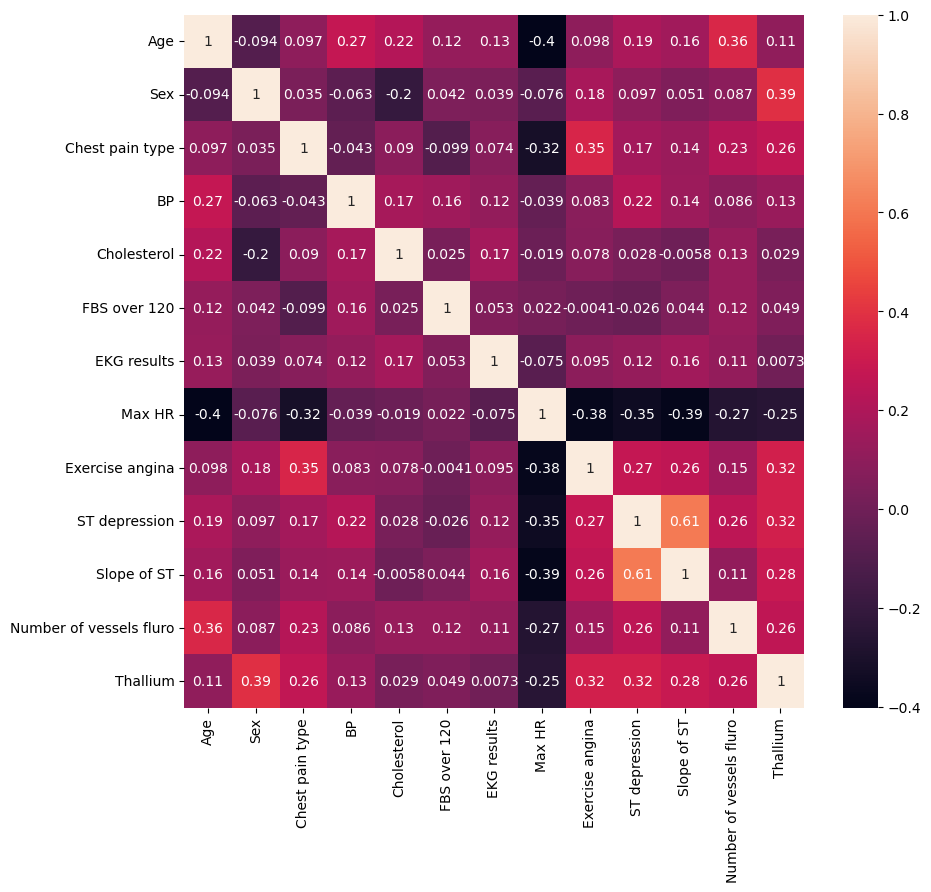

In [10]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)

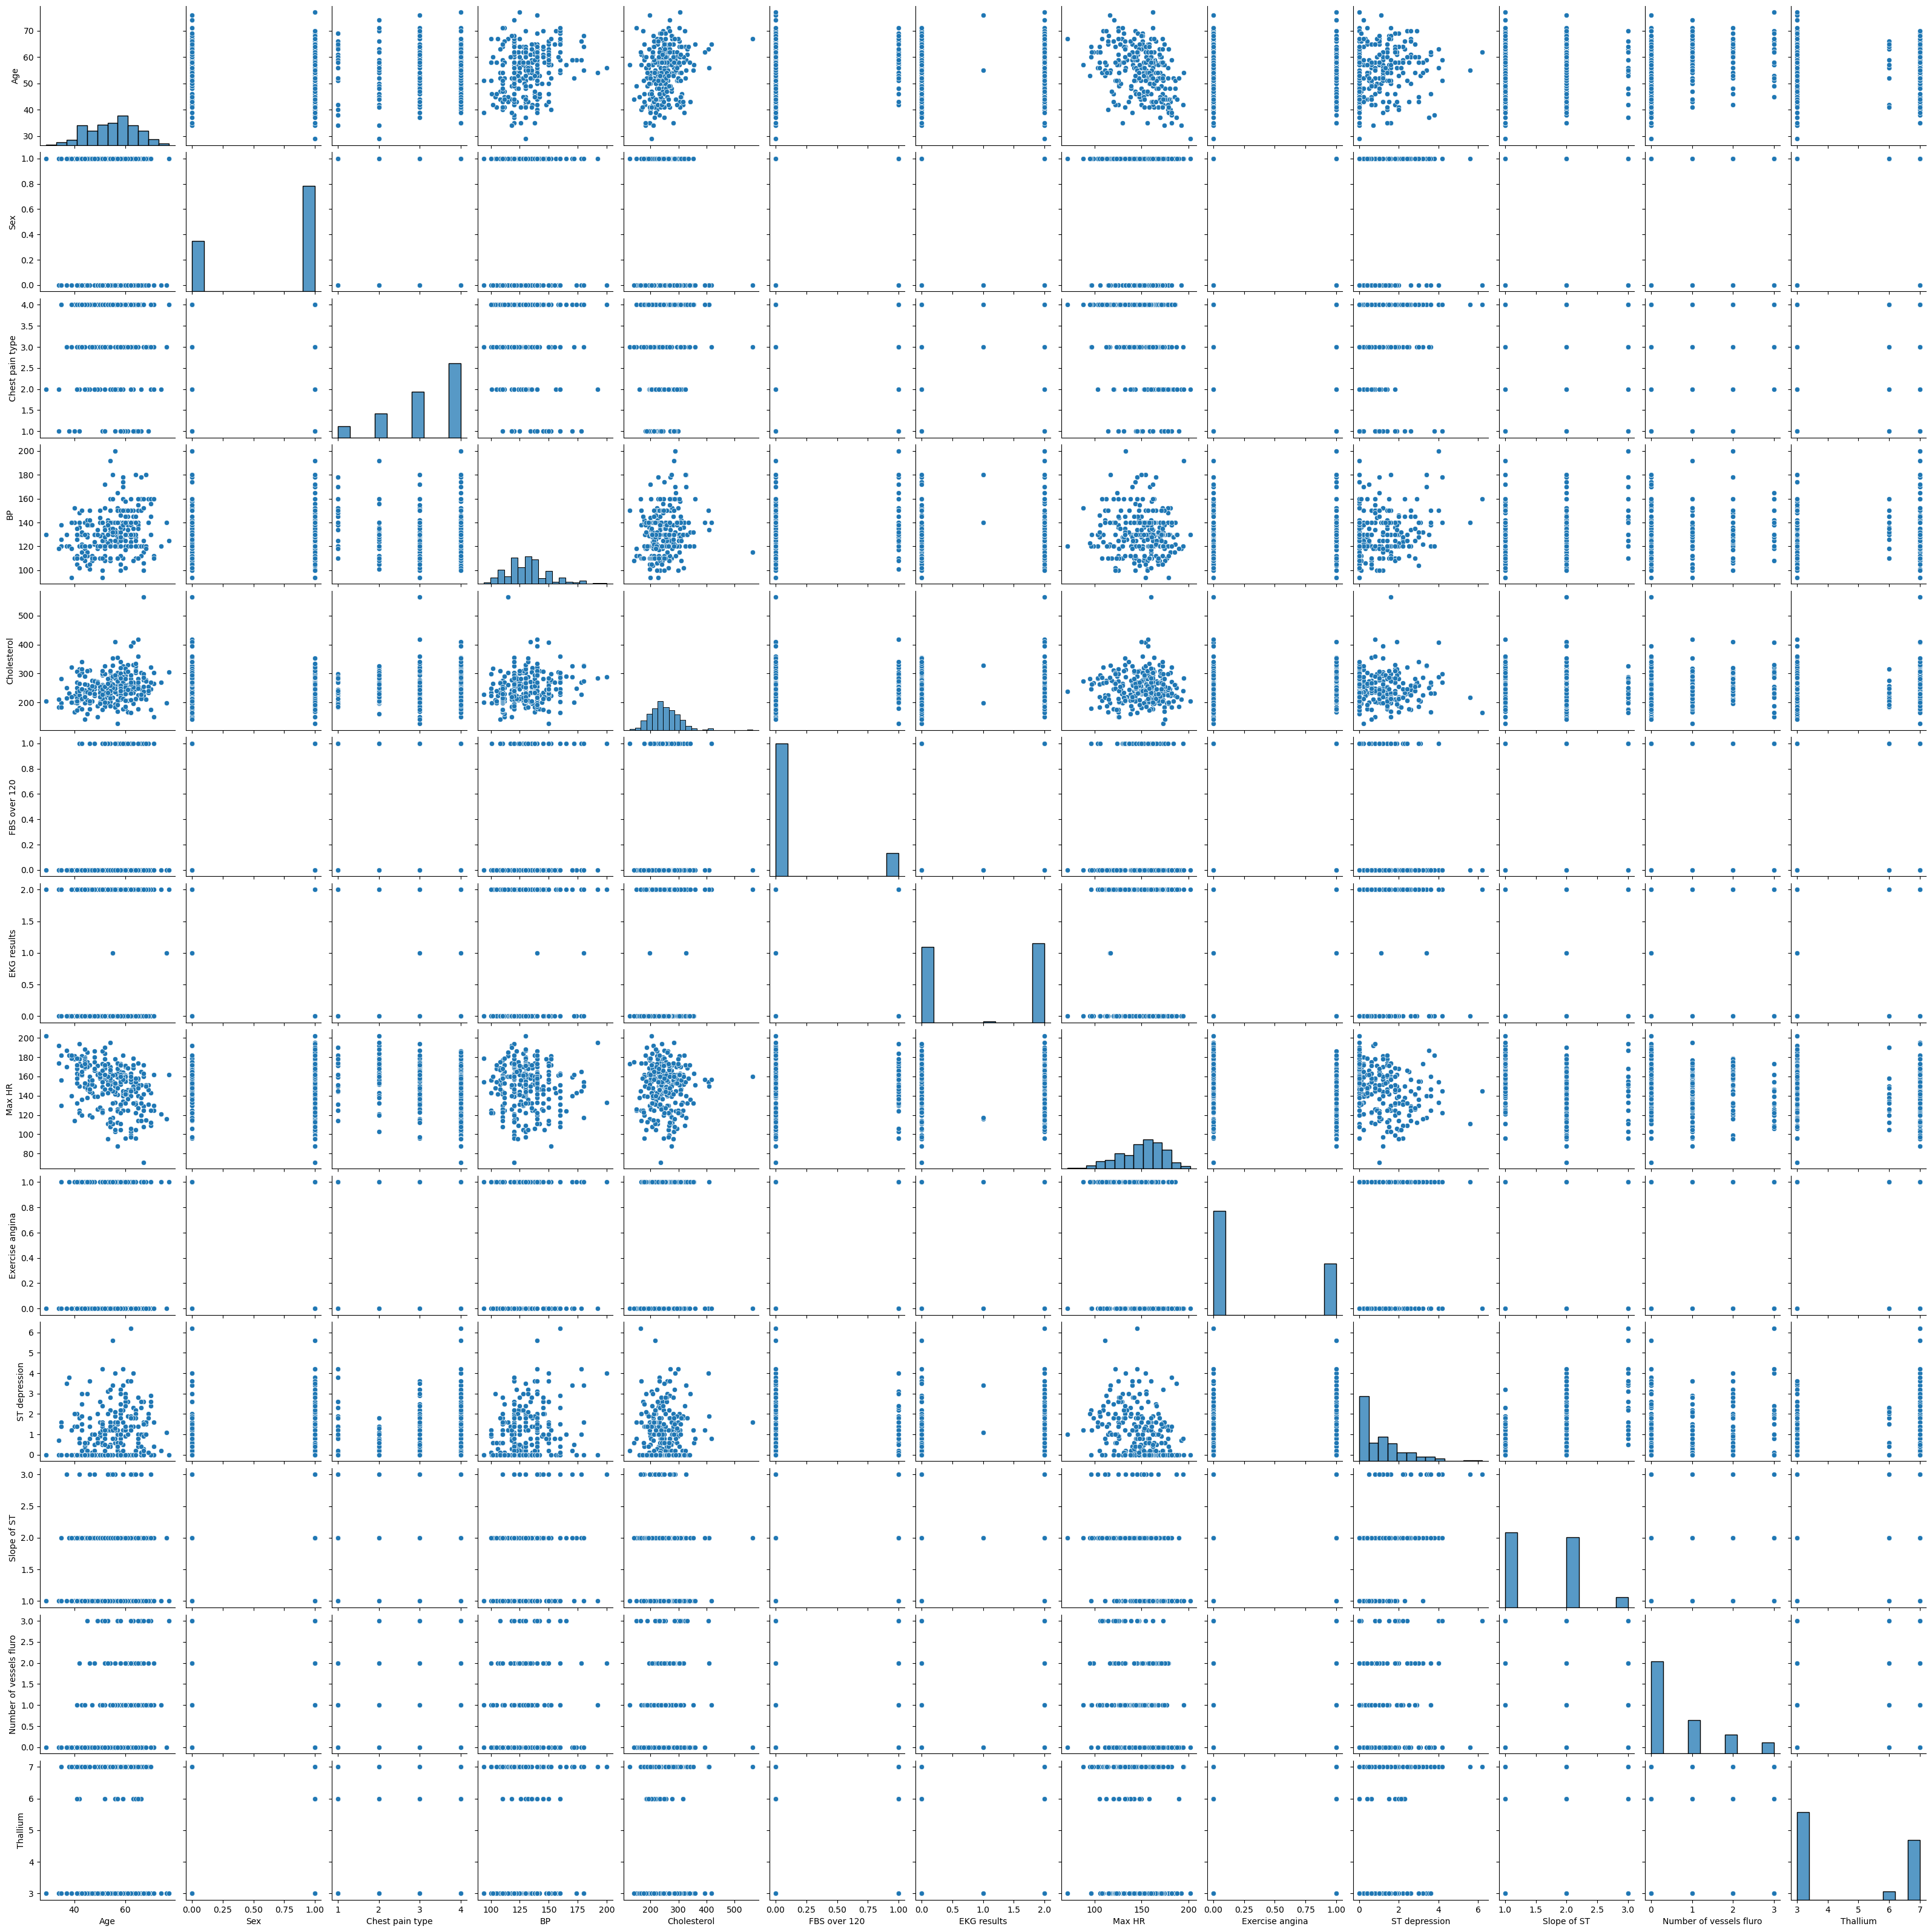

In [11]:
sns.pairplot(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_8392\2214912653.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=df['Age'],shade=True)


<Axes: xlabel='Age', ylabel='Density'>

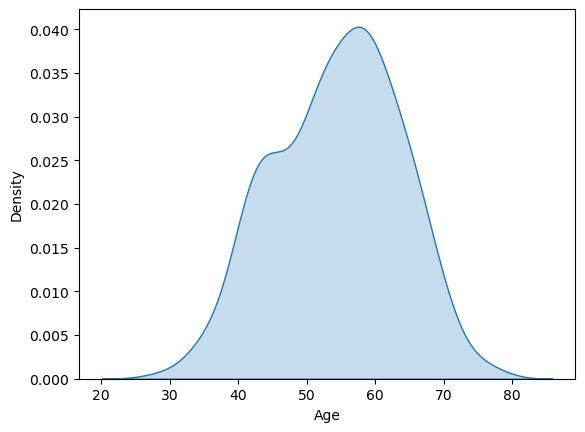

In [12]:
sns.kdeplot(data=df,x=df['Age'],shade=True)

In [13]:
df.shape

(270, 14)

Axes(0.125,0.11;0.775x0.77)


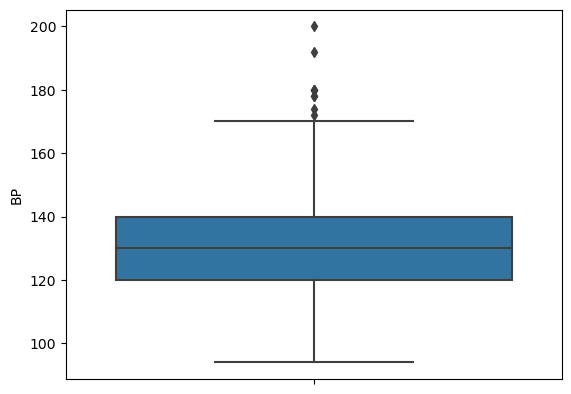

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
col=["BP"]                                              # we have to remove outliers
for i in col:
    print(sns.boxplot(y=df[i]))
    plt.figure()

Axes(0.125,0.11;0.775x0.77)


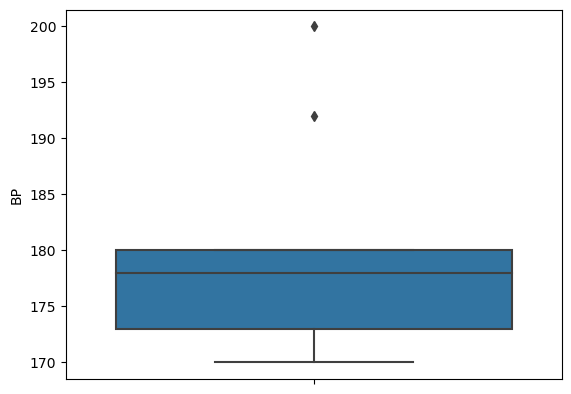

<Figure size 640x480 with 0 Axes>

In [15]:
col=['BP']
for i in col:
     q1=df[i].quantile(.25)
     q3=df[i].quantile(.75)
     iqr=q3-q1
     upper_extreme=q3+(1.5*iqr)
     lower_extreme=q3+(1.5*iqr)
     df=df[df[i]>=lower_extreme]
     df=df[df[i]>=upper_extreme]
        
col=['BP']
for i in col:
    print(sns.boxplot(y=df[i]))
    plt.figure()
plt.show()            

# Linear Regression

In [16]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,:-1].values

In [17]:
X.shape

(11, 13)

In [18]:
X

array([[5.90e+01, 1.00e+00, 4.00e+00, 1.70e+02, 3.26e+02, 0.00e+00,
        2.00e+00, 1.40e+02, 1.00e+00, 3.40e+00, 3.00e+00, 0.00e+00,
        7.00e+00],
       [5.90e+01, 0.00e+00, 4.00e+00, 1.74e+02, 2.49e+02, 0.00e+00,
        0.00e+00, 1.43e+02, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        3.00e+00],
       [5.90e+01, 1.00e+00, 1.00e+00, 1.78e+02, 2.70e+02, 0.00e+00,
        2.00e+00, 1.45e+02, 0.00e+00, 4.20e+00, 3.00e+00, 0.00e+00,
        7.00e+00],
       [5.50e+01, 0.00e+00, 4.00e+00, 1.80e+02, 3.27e+02, 0.00e+00,
        1.00e+00, 1.17e+02, 1.00e+00, 3.40e+00, 2.00e+00, 0.00e+00,
        3.00e+00],
       [5.60e+01, 0.00e+00, 4.00e+00, 2.00e+02, 2.88e+02, 1.00e+00,
        2.00e+00, 1.33e+02, 1.00e+00, 4.00e+00, 3.00e+00, 2.00e+00,
        7.00e+00],
       [5.40e+01, 1.00e+00, 2.00e+00, 1.92e+02, 2.83e+02, 0.00e+00,
        2.00e+00, 1.95e+02, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        7.00e+00],
       [6.60e+01, 0.00e+00, 4.00e+00, 1.78e+02, 2.28e+02, 1.00e+00,
  

In [19]:
Y

array([[5.90e+01, 1.00e+00, 4.00e+00, 1.70e+02, 3.26e+02, 0.00e+00,
        2.00e+00, 1.40e+02, 1.00e+00, 3.40e+00, 3.00e+00, 0.00e+00,
        7.00e+00],
       [5.90e+01, 0.00e+00, 4.00e+00, 1.74e+02, 2.49e+02, 0.00e+00,
        0.00e+00, 1.43e+02, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        3.00e+00],
       [5.90e+01, 1.00e+00, 1.00e+00, 1.78e+02, 2.70e+02, 0.00e+00,
        2.00e+00, 1.45e+02, 0.00e+00, 4.20e+00, 3.00e+00, 0.00e+00,
        7.00e+00],
       [5.50e+01, 0.00e+00, 4.00e+00, 1.80e+02, 3.27e+02, 0.00e+00,
        1.00e+00, 1.17e+02, 1.00e+00, 3.40e+00, 2.00e+00, 0.00e+00,
        3.00e+00],
       [5.60e+01, 0.00e+00, 4.00e+00, 2.00e+02, 2.88e+02, 1.00e+00,
        2.00e+00, 1.33e+02, 1.00e+00, 4.00e+00, 3.00e+00, 2.00e+00,
        7.00e+00],
       [5.40e+01, 1.00e+00, 2.00e+00, 1.92e+02, 2.83e+02, 0.00e+00,
        2.00e+00, 1.95e+02, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        7.00e+00],
       [6.60e+01, 0.00e+00, 4.00e+00, 1.78e+02, 2.28e+02, 1.00e+00,
  

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=67)

In [21]:
X_train

array([[ 56. ,   0. ,   4. , 200. , 288. ,   1. ,   2. , 133. ,   1. ,
          4. ,   3. ,   2. ,   7. ],
       [ 52. ,   1. ,   3. , 172. , 199. ,   1. ,   0. , 162. ,   0. ,
          0.5,   1. ,   0. ,   7. ],
       [ 66. ,   0. ,   4. , 178. , 228. ,   1. ,   0. , 165. ,   1. ,
          1. ,   2. ,   2. ,   7. ],
       [ 59. ,   0. ,   4. , 174. , 249. ,   0. ,   0. , 143. ,   1. ,
          0. ,   2. ,   0. ,   3. ],
       [ 64. ,   0. ,   4. , 180. , 325. ,   0. ,   0. , 154. ,   1. ,
          0. ,   1. ,   0. ,   3. ],
       [ 68. ,   1. ,   3. , 180. , 274. ,   1. ,   2. , 150. ,   1. ,
          1.6,   2. ,   0. ,   7. ],
       [ 54. ,   1. ,   2. , 192. , 283. ,   0. ,   2. , 195. ,   0. ,
          0. ,   1. ,   1. ,   7. ],
       [ 55. ,   0. ,   4. , 180. , 327. ,   0. ,   1. , 117. ,   1. ,
          3.4,   2. ,   0. ,   3. ]])

In [22]:
X_train.shape

(8, 13)

In [23]:
Y_train

array([[ 56. ,   0. ,   4. , 200. , 288. ,   1. ,   2. , 133. ,   1. ,
          4. ,   3. ,   2. ,   7. ],
       [ 52. ,   1. ,   3. , 172. , 199. ,   1. ,   0. , 162. ,   0. ,
          0.5,   1. ,   0. ,   7. ],
       [ 66. ,   0. ,   4. , 178. , 228. ,   1. ,   0. , 165. ,   1. ,
          1. ,   2. ,   2. ,   7. ],
       [ 59. ,   0. ,   4. , 174. , 249. ,   0. ,   0. , 143. ,   1. ,
          0. ,   2. ,   0. ,   3. ],
       [ 64. ,   0. ,   4. , 180. , 325. ,   0. ,   0. , 154. ,   1. ,
          0. ,   1. ,   0. ,   3. ],
       [ 68. ,   1. ,   3. , 180. , 274. ,   1. ,   2. , 150. ,   1. ,
          1.6,   2. ,   0. ,   7. ],
       [ 54. ,   1. ,   2. , 192. , 283. ,   0. ,   2. , 195. ,   0. ,
          0. ,   1. ,   1. ,   7. ],
       [ 55. ,   0. ,   4. , 180. , 327. ,   0. ,   1. , 117. ,   1. ,
          3.4,   2. ,   0. ,   3. ]])

In [24]:
Y_test

array([[5.90e+01, 1.00e+00, 4.00e+00, 1.70e+02, 3.26e+02, 0.00e+00,
        2.00e+00, 1.40e+02, 1.00e+00, 3.40e+00, 3.00e+00, 0.00e+00,
        7.00e+00],
       [5.90e+01, 1.00e+00, 1.00e+00, 1.70e+02, 2.88e+02, 0.00e+00,
        2.00e+00, 1.59e+02, 0.00e+00, 2.00e-01, 2.00e+00, 0.00e+00,
        7.00e+00],
       [5.90e+01, 1.00e+00, 1.00e+00, 1.78e+02, 2.70e+02, 0.00e+00,
        2.00e+00, 1.45e+02, 0.00e+00, 4.20e+00, 3.00e+00, 0.00e+00,
        7.00e+00]])

# Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [26]:
X_test=sc.fit_transform(X_test)

In [27]:
X_train

array([[-0.57735027, -0.77459667,  0.70710678,  2.05129038,  0.39132732,
         1.        ,  1.21355975, -0.88993789,  0.57735027,  1.8124915 ,
         1.88982237,  1.60451491,  0.77459667],
       [-1.28793522,  1.29099445, -0.70710678, -1.13960576, -1.73558149,
         1.        , -0.94387981,  0.44209818, -1.73205081, -0.54796255,
        -1.13389342, -0.72932496,  0.77459667],
       [ 1.1991121 , -0.77459667,  0.70710678, -0.45584231, -1.04254379,
         1.        , -0.94387981,  0.57989501,  0.57735027, -0.21075483,
         0.37796447,  1.60451491,  0.77459667],
       [-0.04441156, -0.77459667,  0.70710678, -0.91168461, -0.5406889 ,
        -1.        , -0.94387981, -0.43061511,  0.57735027, -0.88517027,
         0.37796447, -0.72932496, -1.29099445],
       [ 0.84381962, -0.77459667,  0.70710678, -0.22792115,  1.27554784,
        -1.        , -0.94387981,  0.07463995,  0.57735027, -0.88517027,
        -1.13389342, -0.72932496, -1.29099445],
       [ 1.55440457,  1.290994

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [29]:
reg.coef_


array([[ 4.02726780e+00,  1.86975920e-01,  1.66757609e-02,
        -7.94548178e-01,  7.52442240e-01,  6.14435369e-01,
         3.03681470e-01,  7.10936052e-01,  1.89809455e+00,
        -6.43754599e-01, -1.58957322e-01,  1.47573477e-01,
         4.23253693e-01],
       [ 1.60804179e-02,  1.76509424e-01, -1.18730509e-01,
        -2.83512562e-02, -2.52862772e-02,  6.74962063e-02,
         9.74876669e-02,  6.97590262e-03, -5.51668508e-02,
        -8.23566418e-03, -3.14207309e-02, -1.25910238e-01,
         6.66173657e-02],
       [ 2.09472335e-03, -1.73417008e-01,  2.62000863e-01,
         8.08995186e-02,  1.52252972e-02,  1.31232070e-01,
        -1.84576625e-01, -1.19981995e-01,  9.06781881e-02,
        -1.15083775e-02,  1.60120652e-02, -5.57782051e-03,
        -7.37238470e-02],
       [-1.23857300e+00, -5.13880368e-01,  1.00393662e+00,
         6.84569184e+00,  1.69938292e+00,  1.18961033e+00,
         1.56630589e+00,  5.83671175e-01, -2.52096723e-01,
        -1.62284867e+00,  6.36355623e

In [30]:
reg.intercept_

array([ 59.25  ,   0.375 ,   3.5   , 182.    , 271.625 ,   0.5   ,
         0.875 , 152.375 ,   0.75  ,   1.3125,   1.75  ,   0.625 ,
         5.5   ])

In [31]:
Y_pred=reg.predict(X_test)

In [32]:
Y_pred

array([[ 6.24120726e+01,  8.22073195e-02,  4.08735278e+00,
         1.79621808e+02,  3.03065388e+02,  5.48162030e-01,
         8.56985689e-01,  1.28388857e+02,  1.17930659e+00,
         2.70749419e+00,  2.07324623e+00,  4.23229112e-01,
         4.51440771e+00],
       [ 6.03342737e+01,  5.90648106e-01,  3.01828024e+00,
         1.78294550e+02,  2.58762500e+02,  3.15153081e-01,
         3.81122130e-01,  1.79855730e+02,  4.27056843e-01,
        -4.67788573e-01,  9.33978210e-01,  6.22224910e-01,
         5.82489894e+00],
       [ 5.50036537e+01,  4.52144575e-01,  3.39436698e+00,
         1.88083641e+02,  2.53047111e+02,  6.36684889e-01,
         1.38689218e+00,  1.48880412e+02,  6.43636563e-01,
         1.69779439e+00,  2.24277556e+00,  8.29545978e-01,
         6.16069336e+00]])

# Evaluation

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_squared_error(Y_test,Y_pred)

66.19621059219725

In [35]:
import numpy as np
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

8.136105370027925

In [36]:
df.shape

(11, 14)

In [37]:
r2=metrics.r2_score(Y_test,Y_pred)
n=df.shape[0]
p=df.shape[1]

In [38]:
r2=metrics.r2_score(Y_test,Y_pred)
r2

-0.8026564208874073

In [39]:
Adj_r2=1-(1-r2)*(n-1)/(n-p-1)
Adj_r2

5.5066410522185185

# Logistic Regression

In [40]:
X=df.iloc[:,:-2].values
Y=df.iloc[:,:-2].values

In [41]:
X

array([[5.90e+01, 1.00e+00, 4.00e+00, 1.70e+02, 3.26e+02, 0.00e+00,
        2.00e+00, 1.40e+02, 1.00e+00, 3.40e+00, 3.00e+00, 0.00e+00],
       [5.90e+01, 0.00e+00, 4.00e+00, 1.74e+02, 2.49e+02, 0.00e+00,
        0.00e+00, 1.43e+02, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00],
       [5.90e+01, 1.00e+00, 1.00e+00, 1.78e+02, 2.70e+02, 0.00e+00,
        2.00e+00, 1.45e+02, 0.00e+00, 4.20e+00, 3.00e+00, 0.00e+00],
       [5.50e+01, 0.00e+00, 4.00e+00, 1.80e+02, 3.27e+02, 0.00e+00,
        1.00e+00, 1.17e+02, 1.00e+00, 3.40e+00, 2.00e+00, 0.00e+00],
       [5.60e+01, 0.00e+00, 4.00e+00, 2.00e+02, 2.88e+02, 1.00e+00,
        2.00e+00, 1.33e+02, 1.00e+00, 4.00e+00, 3.00e+00, 2.00e+00],
       [5.40e+01, 1.00e+00, 2.00e+00, 1.92e+02, 2.83e+02, 0.00e+00,
        2.00e+00, 1.95e+02, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [6.60e+01, 0.00e+00, 4.00e+00, 1.78e+02, 2.28e+02, 1.00e+00,
        0.00e+00, 1.65e+02, 1.00e+00, 1.00e+00, 2.00e+00, 2.00e+00],
       [6.40e+01, 0.00e+00, 4.00e+00, 1.8

In [42]:
Y_pred

array([[ 6.24120726e+01,  8.22073195e-02,  4.08735278e+00,
         1.79621808e+02,  3.03065388e+02,  5.48162030e-01,
         8.56985689e-01,  1.28388857e+02,  1.17930659e+00,
         2.70749419e+00,  2.07324623e+00,  4.23229112e-01,
         4.51440771e+00],
       [ 6.03342737e+01,  5.90648106e-01,  3.01828024e+00,
         1.78294550e+02,  2.58762500e+02,  3.15153081e-01,
         3.81122130e-01,  1.79855730e+02,  4.27056843e-01,
        -4.67788573e-01,  9.33978210e-01,  6.22224910e-01,
         5.82489894e+00],
       [ 5.50036537e+01,  4.52144575e-01,  3.39436698e+00,
         1.88083641e+02,  2.53047111e+02,  6.36684889e-01,
         1.38689218e+00,  1.48880412e+02,  6.43636563e-01,
         1.69779439e+00,  2.24277556e+00,  8.29545978e-01,
         6.16069336e+00]])

In [43]:
X_train=sc.fit_transform(X_train)

In [44]:
X_test=sc.fit_transform(X_test)

In [45]:
X_test

array([[ 0.        ,  0.        ,  1.41421356, -0.70710678,  1.34230937,
         0.        ,  0.        , -0.99483201,  1.41421356,  0.46291005,
         0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678, -0.70710678, -0.28559774,
         0.        ,  0.        ,  1.36789401, -0.70710678, -1.38873015,
        -1.41421356,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  1.41421356, -1.05671163,
         0.        ,  0.        , -0.373062  , -0.70710678,  0.9258201 ,
         0.70710678,  0.        ,  0.        ]])

# Modelling

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression()  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.00      0.00      0.00         0
    Presence       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa